# Кортежи. Преобразование коллекций

## Кортежи

Мы уже знаем такие коллекции, как списки, множества и строки. Сегодня мы рассмотрим еще один тип данных, являющийся коллекцией, который называется tuple (читается «тюпл» или «тьюпл», а переводится как «кортеж»).

> ### Кортежи
Кортежи очень похожи на списки, они тоже являются индексированной коллекцией, только вместо квадратных в них используются круглые скобки (причем их часто можно пропускать):

In [1]:
# кортеж из двух элементов; тип элементов может быть любой
card = ('7', 'пик')           
          
# пустой кортеж (из 0 элементов)
empty = ()
 
# кортеж из 1 элемента - запятая нужна, чтобы отличить от обычных скобок
t = (18,)

# длина, значение отдельного элемента, сложение - как у списков
print(len(card), card[0], card + t)

2 7 ('7', 'пик', 18)


Кортежи можно сравнивать между собой:

In [5]:
(1, 2) == (1, 3)    # False
(1, 2) < (1, 3)     # True
(1, 2) < (5,)       # True
('7', 'червей') < ('7', 'треф')    # False

# А вот так сравнивать нельзя: элементы кортежей разных типов
(1, 2) < ('7', 'пик') 

TypeError: '<' not supported between instances of 'int' and 'str'

Обратите внимание: операции == и != применимы к любым кортежам, независимо от типов элементов. А вот операции <, >, <=, >= применимы только в том случае, когда соответствующие элементы кортежей имеют один тип. Поэтому сравнивать ('7', 'червей') и ('7', 'треф') можно, а вот кортежи (1, 2) и ('7', 'пик') нельзя — интерпретатор Python выдаст ошибку. При этом сравнение происходит последовательно элемент за элементом, а если элементы равны — просматривается следующий элемент.

> ### Неизменяемость
Важнейшее техническое отличие кортежей от списков — неизменяемость. Как и к строке, к кортежу нельзя добавить элемент методом append, а существующий элемент нельзя изменить, обратившись к нему по индексу. Это выглядит недостатком, но в дальнейшем мы поймем, что у кортежей есть и преимущества.


Есть и семантическое, то есть смысловое, отличие. Если списки предназначены скорее для объединения неопределенного количества однородных сущностей, то кортеж — быстрый способ объединить под одним именем несколько разнородных объектов, имеющих различный смысл.



Хотя, конечно, ничто не мешает элементам списка иметь разный тип, а элементам кортежа — одинаковый.



Так, в примере выше кортеж card состоит из двух элементов, означающих достоинство карты и ее масть.

Еще одним приятным отличием кортежей от списков является то, что они могут быть элементами множества:

In [6]:
a = {('7', 'червей'), ('7', 'треф')}
print(a) # -> {('7', 'треф'), ('7', 'червей')}

{('7', 'червей'), ('7', 'треф')}


## Присваивание кортежей

Кортежи можно присваивать друг другу. Именно благодаря этому работает красивая особенность Python — уже знакомая нам конструкция вида a, b = b, a.

Как известно, по левую сторону от знака присваивания = должно стоять имя переменной либо имя списка с индексом или несколькими индексами. Они указывают, куда можно «положить» значение, записанное справа от знака присваивания. Однако слева от знака присваивания можно записать еще и кортеж из таких обозначений (грубо говоря, имен переменных), а справа — кортеж из значений, которые следует в них поместить. Значения справа указываются в том же порядке, что и переменные слева (здесь скобки вокруг кортежа необязательны):

In [7]:
n, s = 10, 'hello'
# то же самое, что
n = 10
s = 'hello'

В примере выше мы изготовили кортеж, стоящий справа от =, прямо на этой же строчке. Но можно заготовить его и заранее:

In [8]:
cards = [('7', 'пик'), ('Д', 'треф'), ('Т', 'пик')]
value, suit = cards[0]
print('Достоинство карты:', value)
print('Масть карты:', suit)

Достоинство карты: 7
Масть карты: пик


Самое приятное: сначала вычисляются все значения справа, и лишь затем они кладутся в левую часть оператора присваивания. Поэтому можно, например, поменять местами значения переменных a и b, написав: a, b = b, a.

In [9]:
a, b = 1, 2  # теперь a == 1 and b == 2
a, b = b, a  # теперь a == 2 and b == 1
a, b

(2, 1)

Пример ниже выведет «1 2 3». Убедитесь, что вы понимаете, почему так.

In [10]:
a, b, c = 3, 2, 1
b, a, c = c, a, b
print(b, c, a)

1 2 3


С использованием кортежей многие алгоритмы приобретают волшебную краткость. Например, вычисление чисел Фибоначчи:

In [12]:
n = int(input())
f1, f2 = 0, 1
for i in range(n):
    print(f2)
    f1, f2 = f2, f1 + f2

1
1
2
3
5
8


# Сортировка пузырьком

Итак, у нас есть удобный способ поменять местами значения двух переменных. Теперь рассмотрим алгоритм, в котором эта операция играет важную роль.

Часто бывает нужно, чтобы данные не просто содержались в списке, а были отсортированы (например, по возрастанию), то есть чтобы каждый следующий элемент списка был не меньше предыдущего. В качестве данных могут выступать числа или строки. Скажем, отсортированный список [4, 1, 9, 3, 1] примет вид [1, 1, 3, 4, 9]. Конечно, для этого есть стандартные функции и методы, но как они работают?

Классический алгоритм сортировки — сортировка пузырьком (по-научному — сортировка обменом). Она называется так потому, что элементы последовательно «всплывают» (отправляются в конец списка), как пузырьки воздуха в воде. Сначала всплывает самый большой элемент, за ним — следующий по старшинству и т. д. Для этого мы сравниваем по очереди все соседние пары и при необходимости меняем элементы местами, ставя больший элемент на более старшее место.

Идею наглядно объясняет венгерский народный танец (https://www.youtube.com/watch?v=lyZQPjUT5B4):

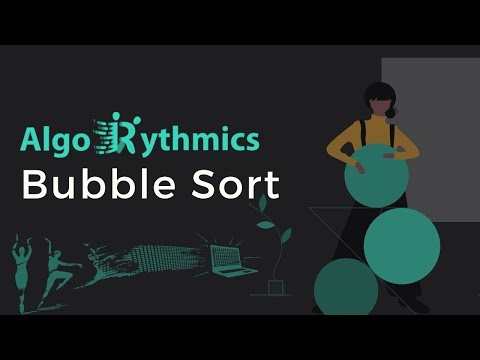

In [13]:
from IPython.display import YouTubeVideo

YouTubeVideo('lyZQPjUT5B4', width=800, height=300)

А полный код программы, которая считывает, сортирует и выводит список, выглядит, например, так:

In [14]:
n = int(input())    # количество элементов
a = []
for i in range(n):  # считываем элементы списка
    a.append(int(input()))
# Сортировка пузырьком:
for i in range(n - 1):
    for j in range(n - 1 - i):
        if a[j] > a[j + 1]:
            a[j], a[j + 1] = a[j + 1], a[j]
print(a)

[2, 3, 3, 3, 5, 6, 6, 6, 6, 8, 8, 9, 24, 67, 234, 765]


# Преобразования между коллекциями

Итак, на данный момент мы знаем уже четыре вида коллекций: строки, списки, множества и кортежи. У вас может возникнуть вопрос: можно ли из одной коллекции сделать другую? Например, преобразовать строку в список или во множество? Конечно, да, для этого можно использовать функции list, set и tuple. Если в качестве аргумента передать этим функциям какую-либо коллекцию, новая коллекция будет создана на ее основе.

> Конечно, на самом деле list, set и tuple — это не функции, а конструкторы объектов. Но говорить об этом сейчас совсем необязательно, к этому вопросу мы в любом случае вернемся в конце года при изучении объектно-ориентированного программирования.

Зачем нужно преобразование коллекций?

Преобразование строки в список позволяет получить список символов. В некоторых задачах это может быть полезно: например, если мы хотим изменить один символ строки:

In [17]:
s = 'симпотичный'   # Написали с ошибкой
a = list(s)         # a == ['с', 'и', 'м', 'п', 'о', 'т', 'и,' 'ч', 'н', 'ы', 'й']
a[4] = 'а'          # a == ['с', 'и', 'м', 'п', 'а', 'т', 'и,' 'ч', 'н', 'ы', 'й']
a

['с', 'и', 'м', 'п', 'а', 'т', 'и', 'ч', 'н', 'ы', 'й']

С этой же целью может потребоваться преобразование кортежа в список:

In [18]:
# В кортеже (писатель, дата рождения) допущена ошибка
writer = ('Лев Толстой', 1827)
a = list(writer)                # a == ['Лев Толстой', 1827]
a[1] = 1828                     # a == ['Лев Толстой', 1828]
a

['Лев Толстой', 1828]

Преобразование списка или строки во множество позволяет получить очень интересные результаты. Как вы помните, все элементы множества должны быть уникальны, поэтому при преобразовании списка во множество каждый элемент останется только в одном экземпляре. Таким образом, можно очень легко убрать повторяющиеся элементы и узнать, сколько элементов встречается в списке хотя бы один раз:

In [19]:
a = [1, 2, 1, 1, 2, 2, 3, 3]
print('Количество элементов в списке без повторений: ', len(set(a)))

Количество элементов в списке без повторений:  3


Таким же образом можно получить все буквы без повторений, которые встречаются в строке:

In [20]:
a = set("Тетрагидропиранилциклопентилтетрагидропиридопиридиновые")
print(a, len(a))

{'и', 'Т', 'е', 'г', 'ц', 'а', 'р', 'н', 'п', 'в', 'ы', 'к', 'д', 'л', 'о', 'т'} 16


Преобразование множества в список тоже возможно, но при этом нужно учитывать, что элементы множества не упорядочены и при преобразовании множества в список порядок элементов в нем предсказать заранее не всегда возможно:

In [21]:
names = {'Иван', 'Петр', 'Сергей', 'Алексей'}
print(list(names))
# Возможные варианты вывода на экран - ['Сергей', 'Алексей', 'Иван', 'Петр'], 
# ['Сергей', 'Петр', 'Иван', 'Алексей'], ['Алексей', 'Иван', 'Петр', 'Сергей'] 
# и так далее.

['Петр', 'Сергей', 'Алексей', 'Иван']


## Упражнения

### Упражнение 1

Получите последовательность целых чисел, которая строится по следующему правилу: начальный член последовательности равен нулю, каждый следующий член последовательности равен количеству совпадений между уже построенным куском последовательности и им же в обратном порядке.

Например, первые семь членов последовательности таковы:
> 0,1,0,3,0,3,0

В обратном порядке:
>0,3,0,3,0,1,0

Имеется совпадение в пяти позициях, поэтому следующий член последовательности будет равен 5.
#### Формат ввода

Натуральное число — количество членов последовательности, которые нужно вывести.
#### Формат вывода

Целые числа — члены последовательности.


![title](img/ex1.png)

In [26]:
# код решения

print('Введите количество членов последовательности')
n = int(input())

sequence = [0]

for _ in range(1, n):
    reversed_sequence = sequence[::-1] 
    matches = sum(1 for i in range(len(sequence)) if sequence[i] == reversed_sequence[i])
    sequence.append(matches) 

print(sequence)

Введите количество членов последовательности
[0, 1, 0, 3, 0, 3, 0, 5]


### Упражнение 2

Числа Трибоначчи — это последовательность целых чисел, которая определяется так:

- первое, второе и третье числа Трибоначчи равны единице;
- каждое следующее число Трибоначчи равно сумме трёх предыдущих.

В общем, почти как числа Фибоначчи.

Напишите программу, которая вычисляет числа Трибоначчи.
#### Формат ввода

Вводится одно натуральное число N (N <= 75).
#### Формат вывода

Выводятся первые N чисел Трибоначчи.


![image.png](img/ex2.png)

In [37]:
# код решения

n = int(input())
t1, t2, t3 = 1, 1, 1
print(f'{t1}\n{t2}')
for i in range(n - 2):
    print(t3)
    t1, t2, t3 = t2, t3, t1 + t2 + t3

1
1
1
3
5
9


### Упражнение 3



Отсортируйте введённые строки по возрастанию в алфавитном порядке. В этой задаче (и других задачах к этому занятию) под алфавитным порядком подразумевается, что каждая следующая строка должна быть больше предыдущей с точки зрения оператора сравнения «>» в Питоне; в частности, все строчные буквы идут после всех заглавных.
#### Формат ввода

На первой строке вводится натуральное число N — количество строк.
Далее следуют N строк, которые надо будет отсортировать.
#### Формат вывода

Выводятся те же N строк, но не в том порядке, в котором они вводились, а в алфавитном порядке по возрастанию.


![title](img/ex3.png)

In [38]:
# код решения

print('Введите количество строк')
n = int(input())

str = [input() for _ in range(n)]

sort_str = sorted(str)

for str in sort_str:
    print(str)

Введите количество строк
арбуз
дерево
яблоко


### Упражнение 4



Похоже, начинается шторм, волны все выше и выше. По крайней мере, у каждой волны свой балл волнения моря.

Выберите волны, за которыми следует волна с большим баллом волнения.
#### Формат ввода

Вводится число – количество волн, затем строки: волна и через пробел балл волнения – от 0 (штиль) до 9 (ураган).
#### Формат вывода

Нужно найти волны, которые имеют волнение меньше, чем у следующей волны. И для таких волн в порядке ввода вывести кортежи:
(номер волны по порядку, строка с волной, у которой балл волнения меньше, чем у следующей).


![title](img/ex4.png)

In [46]:
# код решения

print('Введите количество волн')
n = int(input())

waves = []
for i in range(n):
    print(f'Введите волну {i + 1} и её балл волнения')
    wave_data = input()
    wave, score = wave_data.rsplit(' ', 1) 
    waves.append((i + 1, wave, int(score)))

result = []
for i in range(n - 1):
    if waves[i][2] < waves[i + 1][2]: 
        result.append(waves[i])  

for item in result:
    print(item)

Введите количество волн
Введите волну 1 и её балл волнения
Введите волну 2 и её балл волнения
Введите волну 3 и её балл волнения
(1, 'Волна1', 3)
